<a href="https://colab.research.google.com/github/Massato01/RNA-AproximadorDeFuncoes/blob/main/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando Arquivo de teste
Executando simulações para arquitetura: (2,)
Arquitetura (2,): Média do erro = 65.09029176491529, Desvio padrão = 28.797214294505547


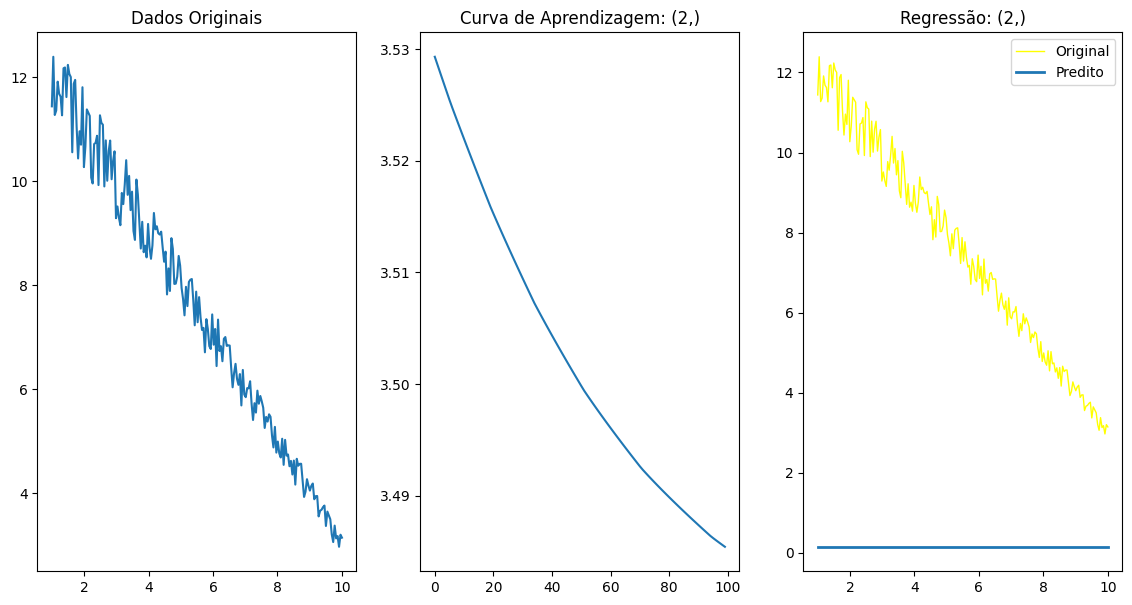

Executando simulações para arquitetura: (5, 2)
Arquitetura (5, 2): Média do erro = 48.13587909775187, Desvio padrão = 14.72289899840005


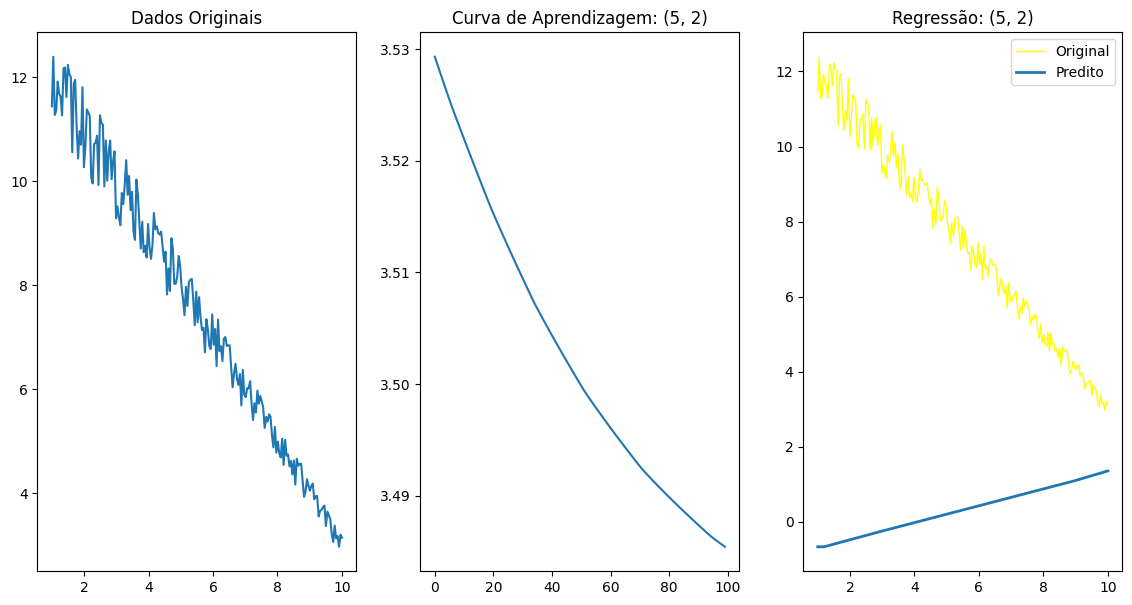

Executando simulações para arquitetura: (10, 5, 2)
Arquitetura (10, 5, 2): Média do erro = 63.20886073118395, Desvio padrão = 14.637657237487405


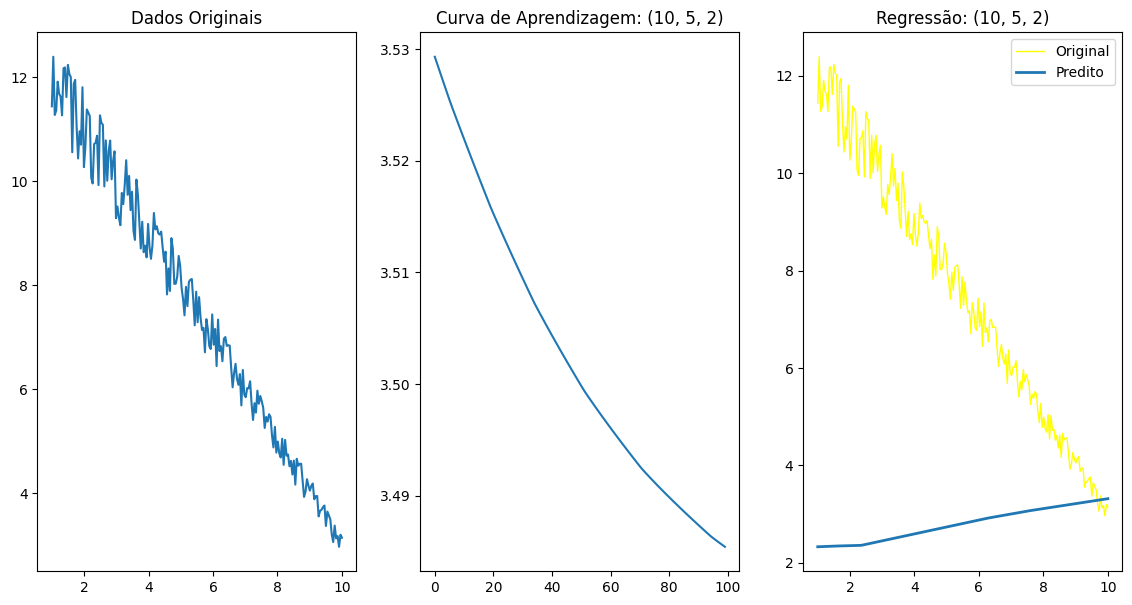

Executando simulações para arquitetura: (2,)
Arquitetura (2,): Média do erro = 312.16509346548867, Desvio padrão = 140.72736819044297


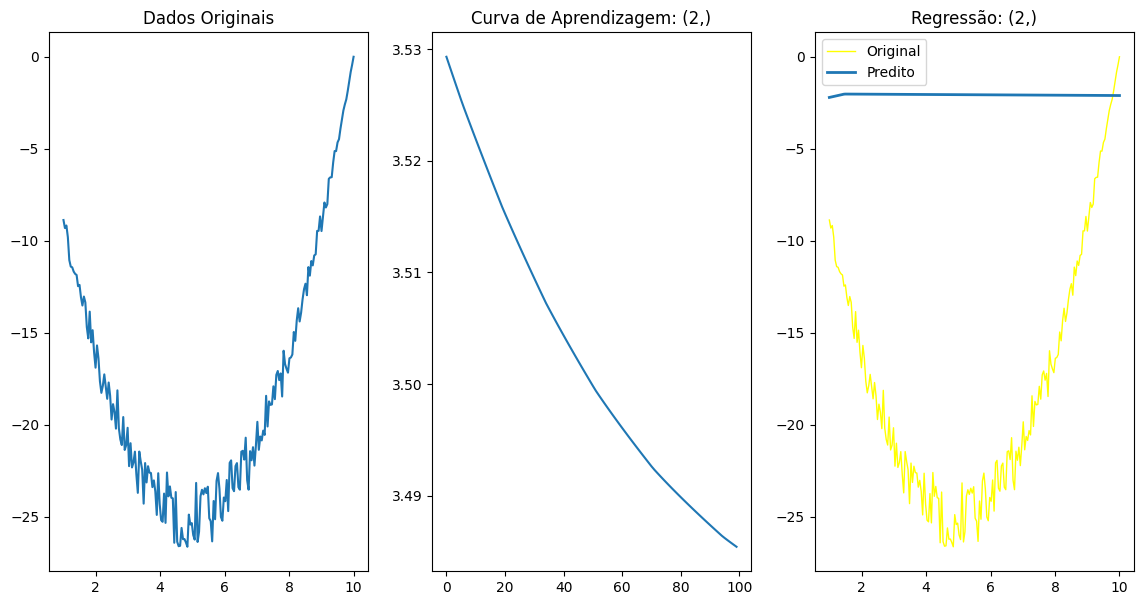

Executando simulações para arquitetura: (5, 2)
Arquitetura (5, 2): Média do erro = 324.56068802441223, Desvio padrão = 70.83583728074223


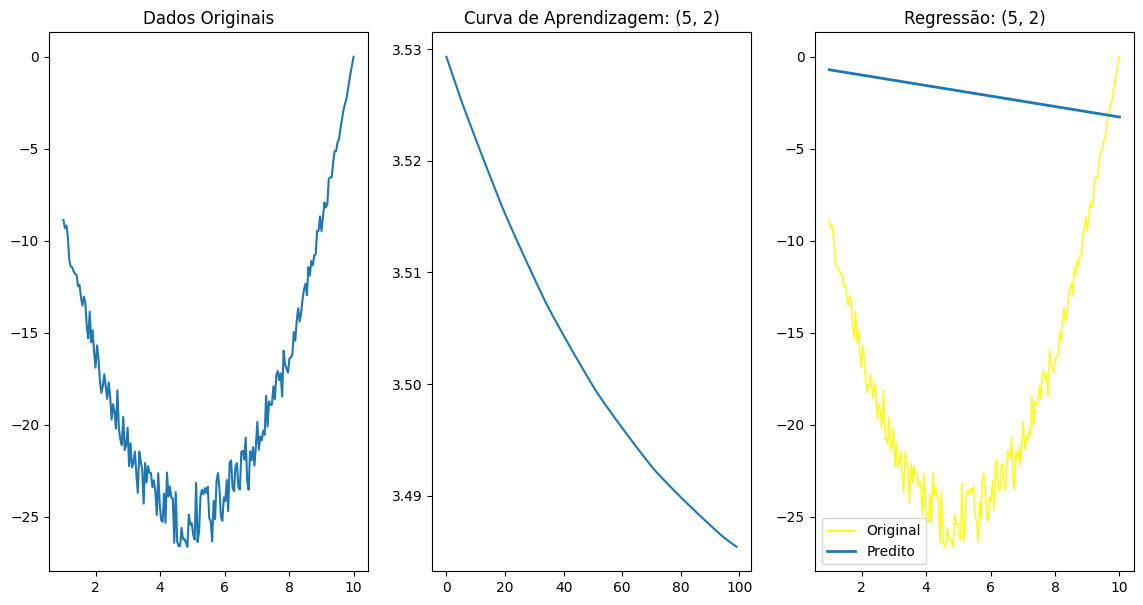

Executando simulações para arquitetura: (10, 5, 2)
Arquitetura (10, 5, 2): Média do erro = 300.24013477161964, Desvio padrão = 71.14898985586309


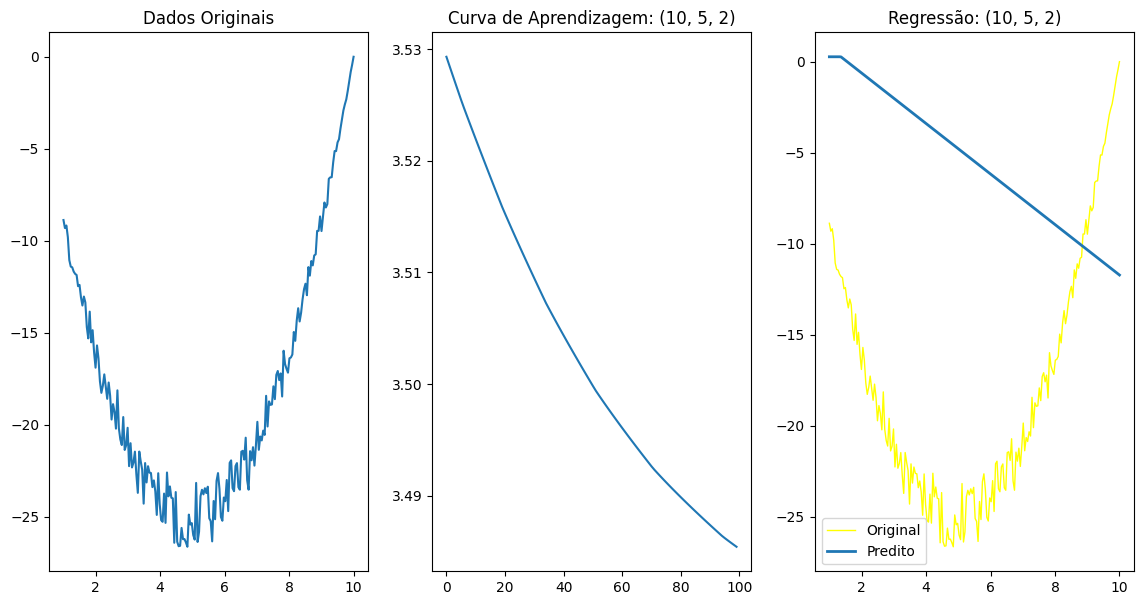

Executando simulações para arquitetura: (2,)
Arquitetura (2,): Média do erro = 8014.021789587336, Desvio padrão = 239.54527951702119


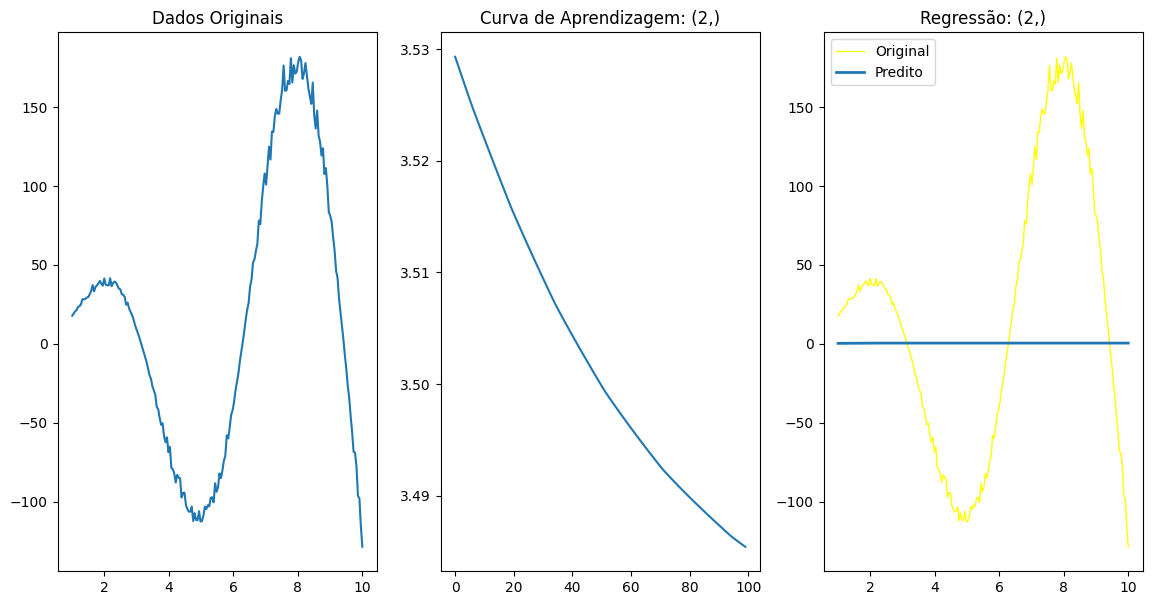

Executando simulações para arquitetura: (5, 2)
Arquitetura (5, 2): Média do erro = 7962.6681090592, Desvio padrão = 132.73455980427258


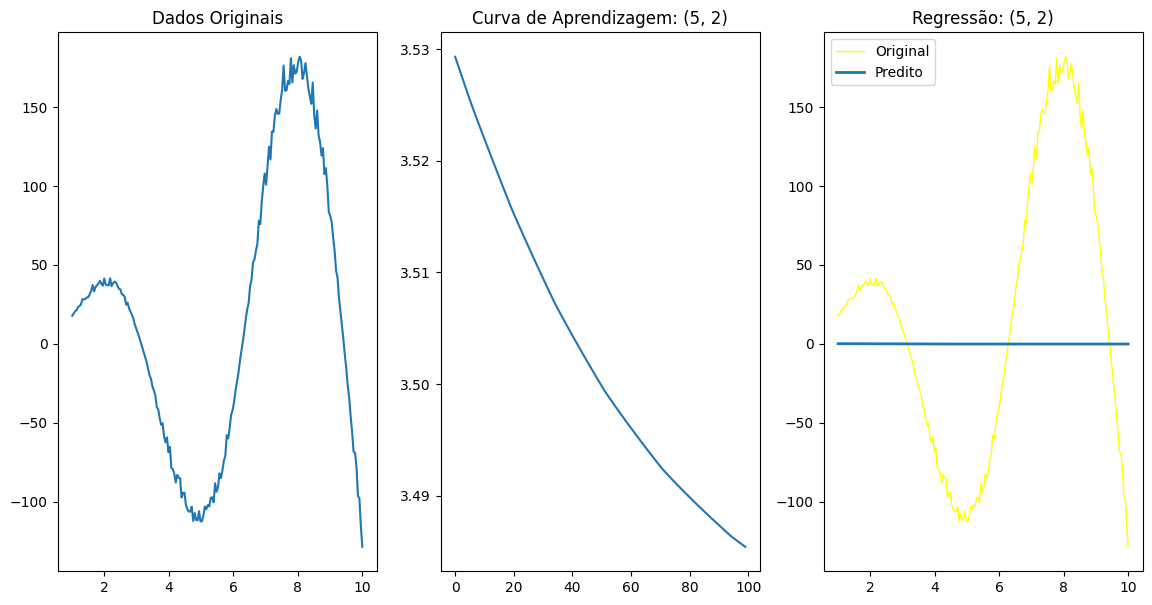

Executando simulações para arquitetura: (10, 5, 2)
Arquitetura (10, 5, 2): Média do erro = 7959.9859893891435, Desvio padrão = 101.51557833503371


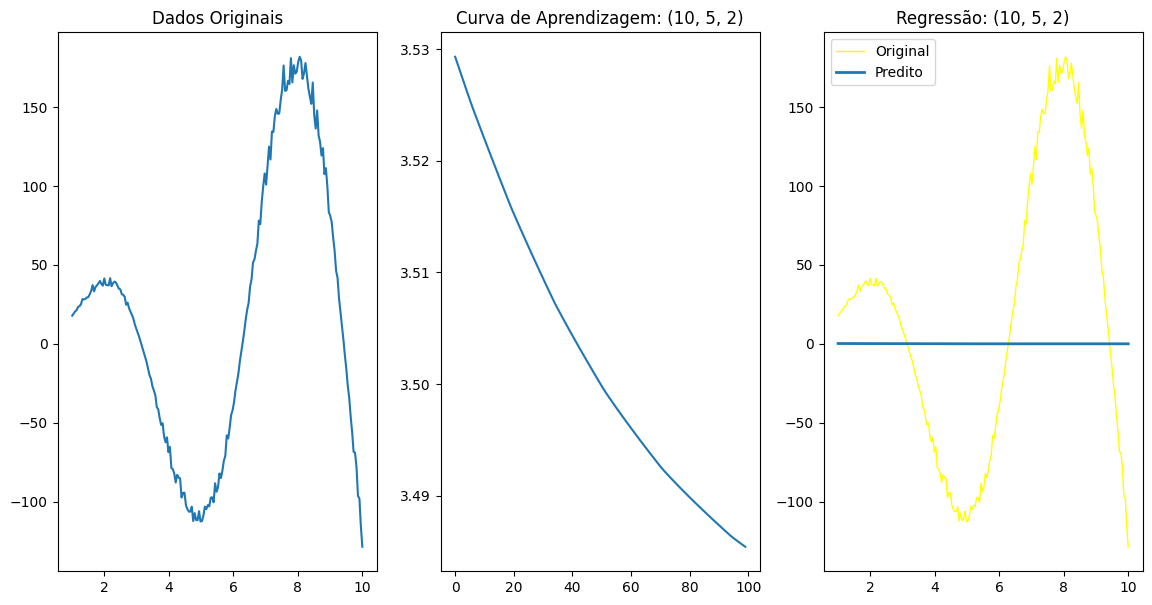

Executando simulações para arquitetura: (2,)
Arquitetura (2,): Média do erro = 9735.80039790329, Desvio padrão = 5.670222909929364


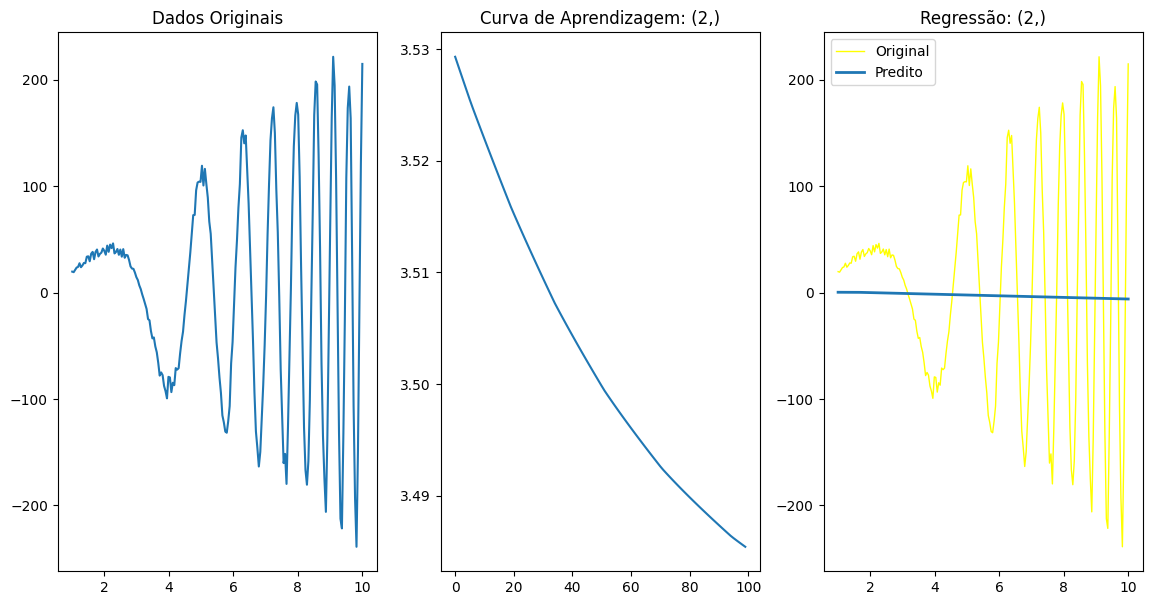

Executando simulações para arquitetura: (5, 2)
Arquitetura (5, 2): Média do erro = 9730.858556377421, Desvio padrão = 3.324841508949633


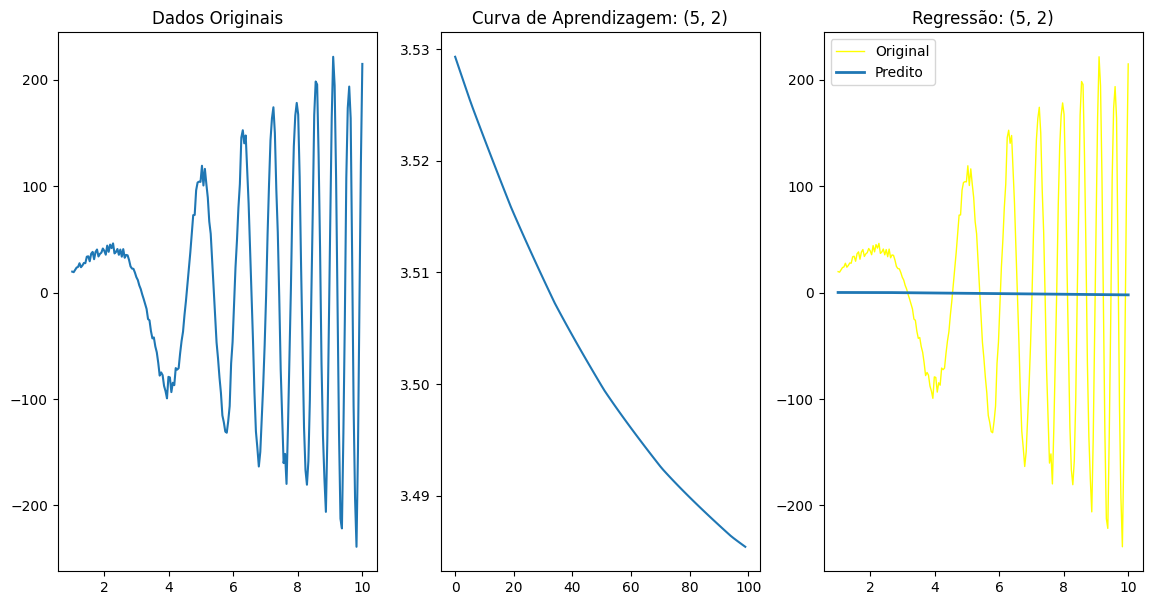

Executando simulações para arquitetura: (10, 5, 2)
Arquitetura (10, 5, 2): Média do erro = 9730.807310850298, Desvio padrão = 9.913092876995464


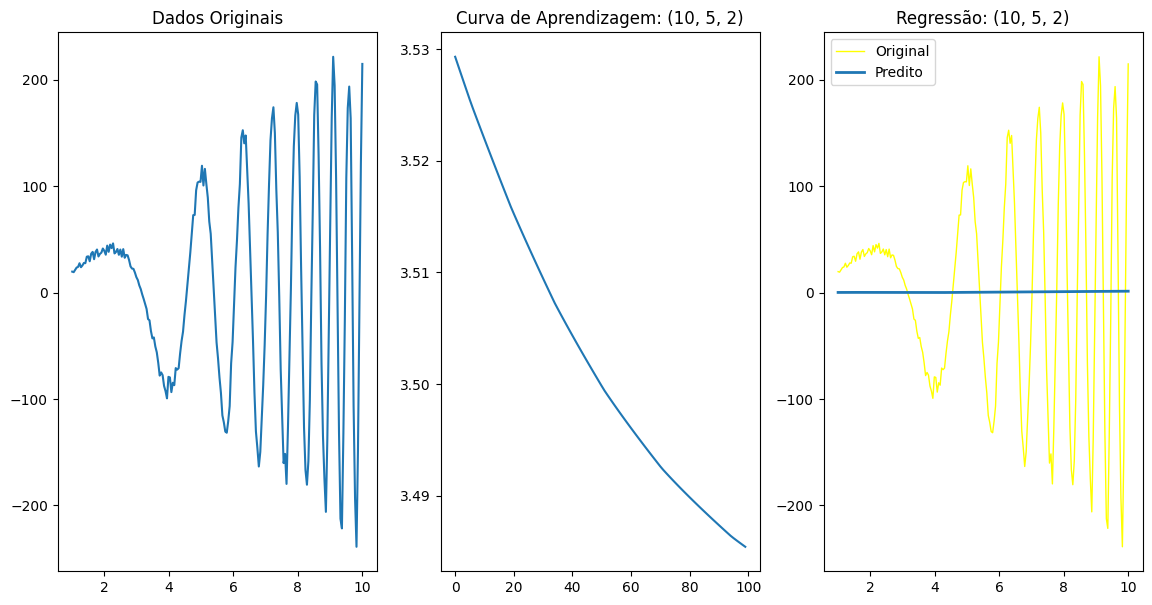

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignorar avisos de ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Função para realizar as simulações com uma dada arquitetura e calcular os erros
def run_simulations(x, y, hidden_layer_sizes, n_simulations=10):
    errors = []

    for i in range(n_simulations):
        regr = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                            max_iter=100,
                            activation='relu',
                            solver='adam',
                            learning_rate='adaptive',
                            n_iter_no_change=50)
        regr.fit(x, y)
        y_pred = regr.predict(x)
        error = mean_squared_error(y, y_pred)
        errors.append(error)

    mean_error = np.mean(errors)
    std_error = np.std(errors)
    return mean_error, std_error, y_pred

# Carregar dados de teste
print('Carregando Arquivo de teste')
for test in range(2, 6):  # Testes de 2 a 5
    arquivo = np.load(f'teste{test}.npy')
    x = arquivo[0]
    y = np.ravel(arquivo[1])

    # Definir diferentes arquiteturas de rede neural
    architectures = [
        (2,),  # 1 camada com 2 neurônios
        (5, 2),  # 2 camadas com 5 e 2 neurônios
        (10, 5, 2)  # 3 camadas com 10, 5 e 2 neurônios
    ]

    # Realizar simulações para cada arquitetura
    for architecture in architectures:
        print(f'Executando simulações para arquitetura: {architecture}')
        mean_error, std_error, y_pred = run_simulations(x, y, hidden_layer_sizes=architecture)

        print(f'Arquitetura {architecture}: Média do erro = {mean_error}, Desvio padrão = {std_error}')

        # Plotar o melhor resultado
        plt.figure(figsize=[14, 7])

        # Gráfico original
        plt.subplot(1, 3, 1)
        plt.plot(x, y, label="Original")
        plt.title('Dados Originais')

        # Gráfico da curva de aprendizagem
        plt.subplot(1, 3, 2)
        plt.plot(regr.loss_curve_)
        plt.title(f'Curva de Aprendizagem: {architecture}')

        # Gráfico do regressor ajustado
        plt.subplot(1, 3, 3)
        plt.plot(x, y, linewidth=1, color='yellow', label='Original')
        plt.plot(x, y_pred, linewidth=2, label='Predito')
        plt.title(f'Regressão: {architecture}')
        plt.legend()

        plt.show()